In [ ]:
#importations
import tweepy
from tweepy import API
from tweepy import OAuthHandler
import pandas as pd
import matplotlib.pyplot as plt
import csv
from nltk.tokenize import RegexpTokenizer, WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
import string
from string import punctuation
import en_core_web_sm
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
from sklearn.cluster import KMeans
from scipy import stats


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
#definition des clés
CONSUMER_KEY    = 'l0Ama9OIZYfUyJHWEo1TpDj0q'
CONSUMER_SECRET = 'l3AIIGLyHfbczO1bpSS5KQqXZ8sMthGQRn9MzoikigkRhJX3tP'
ACCESS_TOKEN  = '1328339246898434050-VkR8IxfpgSC4rLK37RbvADsdgAWpLd'
ACCESS_SECRET = 'nHLrrrzXDIdD3pEEH7kzlnu9A9e1essHJb9IhO7swMkK4'

#authentication
auth = OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
#Configuration l'API importer de tweet
api = tweepy.API(auth,wait_on_rate_limit=True)

In [ ]:
#stocker les tweets dans un fichier CSV
fichier ='tweets'+'.csv'
with open (fichier, 'w', newline='',encoding="utf-8") as File:
    FileTab = csv.writer(File)
    FileTab.writerow(['Id','Tweet','Nom'])
    for tweet in tweepy.Cursor(api.search, q='Politics', lang = 'en').items(3000):
        tweets_encoded = tweet.text.encode('utf-8')
        tweets_decoded = tweets_encoded.decode('utf-8')
        FileTab.writerow([tweet.id,tweets_decoded,tweet.user.name])
    for tweet in tweepy.Cursor(api.search, q='culture', lang = 'en').items(3500):
        tweets_encoded = tweet.text.encode('utf-8')
        tweets_decoded = tweets_encoded.decode('utf-8')
        FileTab.writerow([tweet.id,tweets_decoded,tweet.user.name])
    for tweet in tweepy.Cursor(api.search, q='sport', lang = 'en').items(3500):
        tweets_encoded = tweet.text.encode('utf-8')
        tweets_decoded = tweets_encoded.decode('utf-8')
        FileTab.writerow([tweet.id,tweets_decoded,tweet.user.name])

In [ ]:
#recuperation des tweets de nouveau 
fichierTweet = pd.read_csv('tweets.csv')

In [ ]:
fichierTweet.head(10000)

,Id,Tweet,Nom
0,1338827158953725952,RT @Shehzad_Ind: So AAP in Delhi notified the ...,Ishwar Singh
1,1338827158211485696,Central Banks yet again played “saviours of la...,Simon Quijano-Evans
2,1338827153409007617,RT @CNNPolitics: JUST IN: The Electoral Colleg...,Anita
3,1338827151202807810,"RT @ABC: ""In America, politicians don’t take p...",debra l. dooley
4,1338827150812647424,RT @NYDailyNews: America voted. The Supreme Co...,BidenBeatTrump2020
...,...,...,...
9995,1338813381545955328,RT @LivEchoLFC: Gerrard spoke about Houllier i...,Margaret Lloyd
9996,1338813379281113090,Is there a more dramatic sport than ⚽️? https:...,𝖱𝖮𝖡 𝖬𝖠𝖣𝖤𝖫𝖬𝖠𝖸𝖤𝖱
9997,1338813378563895298,@jakepaul @TheNotoriousMMA Yeah he's 0-1 again...,Conor Mackay
9998,1338813377678860295,"An eye opening, brilliantly researched, and hu...",Nima Suchak


In [ ]:
## nettoyage des Tweets

In [ ]:
import re
def clean_text(df,nom , tweet):
    df[tweet] = df[tweet].str.lower()
    df[tweet] = df[tweet].apply(lambda x: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|""|^rt|http.+?|([0-9])", "", x))

    
    df[nom] = df[nom].str.lower()
    df[tweet] = df[tweet].apply(lambda x: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|""|^rt|http.+?|([0-9])", "", x))
    return df

clean_tweets = clean_text(fichierTweet, 'Nom','Tweet')
clean_tweets.head(10000)

,Id,Tweet,Nom
0,1338827158953725952,rt ind so aap in delhi notified the new farm l...,ishwar singh
1,1338827158211485696,central banks yet again played saviours of las...,simon quijano-evans
2,1338827153409007617,rt just in the electoral college affirms pres...,anita
3,1338827151202807810,rt in america politicians dont take power peo...,debra l. dooley
4,1338827150812647424,rt america voted the supreme court ruled now ...,bidenbeattrump2020
...,...,...,...
9995,1338813381545955328,rt gerrard spoke about houllier in his press ...,margaret lloyd
9996,1338813379281113090,is there a more dramatic sport than,𝖱𝖮𝖡 𝖬𝖠𝖣𝖤𝖫𝖬𝖠𝖸𝖤𝖱
9997,1338813378563895298,yeah hes 01 against the best boxer of all ti...,conor mackay
9998,1338813377678860295,an eye opening brilliantly researched and huge...,nima suchak


In [ ]:
nlp = en_core_web_sm.load()
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)
w_tokenizer = WhitespaceTokenizer()
            
def fur(text):
    ft = []
    for i in text.split():
        if i.lower() not in stop:
            word = lemmatizer.lemmatize(i)
            ft.append(word.lower())
    return " ".join(ft)

In [ ]:
mots_Politics = ''' government diplomatic law political aristotle politics diplomatical governance republic public administration
politician smooth suave state local government expedient sagacious police election political monarchy parliament dukes sovereign state
polity regime democratic ethics communism federation anarchism authoritarianism populism bland aristocracy tribe power negotiation
force warfare city clans tribes company country plato confucius latin kingship earls politically counts tribute lordship property inheritance
confiscation individualist allegiance espionage conspiracy treason jewish gentile convention observance celibacy pope taxation petition legislation majority
collegial permeates greek language flabby permeating communication commerce  governmental pervades permeated abstract straitjacket justice myopic
discernment curfew consciences revenue pervading pervade matriarchal numbed juridical rightness unaccountable clannish civilised transfigured deliberative
monopoly fatness paternalis mmonkish coin principle sinfulness perverted morass lawmaking'''

In [ ]:
mots_sport = '''racing competition athletics spectator sport game gymnastics basketball team sportsman cycling fun skating tennis soccer leisure football 
athletic games baseball sportswoman position play disport lark boast mutation frolic skylark romp gambol mutant feature  rugby union 
frisk cavort rollick offside call referee champion skiing riding ski rowing netball diversion coach athlete hockey athletes
entertainment olympic coaches polo outdoor sport team sport professional football business lead playing golftelevision chess
running go sportsperson sports sportaccord competitive club race gym youth challenge teams track super pleasure class event exercise
venue activity standards fitness son variation summercater tournament playoffs athleticism dexterity sumo line occupation wipeout
flip pass toss recreation aquatics row archery sledding equitation shot stroke foul possession judo save tuck shooter timekeeper
timer deficit average bout round turn surge seed curl start field shoot umpire drop down bandy submarine kick punt drive
racket carry dribble cut box hike mountaineer rappel backpack pack skate skateboard sled sleigh bob bobsled luge toboggan
scull canoe kayak paddle surf surfboard jackknife snorkel hurdle loose legal disqualified home away ineligible defending
onside underarm underhand underhanded overhand upfield humor humour wit witticism jocularity clowning comedy draughts
tradition goal funambulism birling logrollingoutclass double-team '''


In [ ]:
mots_culture  = '''
society civilization philosophy anthropology subculture acculturation religion cultivation nationalism counterculture
cultural ideology art popular folklore agriculture country writing music monoculture cyberculture language
anthropology cooking literature science growth tillage grow ritual perfection development metaphor concept
symbol mythology gender tradition archaeology clothing traditions traditional western culture contemporary
multiculturalism elite politics ethnicity heritage sociology modernity spirituality marxism ethos nationality
humanism romanticism finish polish refinement civilisation traditionalism genetics human learning interaction kinship heredity
marriage dance technology shelter growing biology starter viticulture discernment content maturation appreciation ontogeny
archeology attitude taste letters institutions humanities acculturate jewelry flawlessness perceptiveness ontogenesis
viniculture meme modern capitalism clothes cultures social intellectual especially nature religious rooted
context cicero societies popular history literary roots important geography historical
folk particular origins phenomenon teleology ancient aspects perspective particularly rousseau architecture life inspired
liberalism influence landscape flourishing urban circles everyday refers foremost ideas aesthetics thriving indigenous
peoples such famous example known chinese describe nowadays community style knowledge unique prevalent describes environment classical
 today common originv interests great behavioral modernity most besides well beliefs importance emphasis kind understanding
themes genre regarded '''

In [ ]:
politique = fur(mots_Politics)
sport = fur(mots_sport)
culture = fur(mots_culture)

In [ ]:
##victoriser

In [ ]:
def get_vecteur(*strs):
    text = [t for t in strs]
    vectorizer = TfidfVectorizer(text)
    vectorizer.fit(text)
    return vectorizer.transform(text).toarray()

In [ ]:
vecteur_Politics = get_vecteur(politique)
vecteur_Sport = get_vecteur(sport)
vecteur_Culture = get_vecteur(culture)

In [ ]:
vecteur_Politics

array([[0.09016696, 0.09016696, 0.09016696, 0.09016696, 0.09016696,
        0.09016696, 0.09016696, 0.09016696, 0.09016696, 0.09016696,
        0.09016696, 0.09016696, 0.09016696, 0.09016696, 0.09016696,
        0.09016696, 0.09016696, 0.09016696, 0.09016696, 0.09016696,
        0.09016696, 0.09016696, 0.09016696, 0.09016696, 0.09016696,
        0.09016696, 0.09016696, 0.09016696, 0.09016696, 0.09016696,
        0.09016696, 0.09016696, 0.09016696, 0.09016696, 0.09016696,
        0.09016696, 0.09016696, 0.09016696, 0.09016696, 0.09016696,
        0.09016696, 0.09016696, 0.09016696, 0.09016696, 0.18033393,
        0.09016696, 0.09016696, 0.09016696, 0.09016696, 0.09016696,
        0.09016696, 0.09016696, 0.09016696, 0.09016696, 0.09016696,
        0.09016696, 0.09016696, 0.09016696, 0.09016696, 0.09016696,
        0.09016696, 0.09016696, 0.09016696, 0.09016696, 0.09016696,
        0.09016696, 0.09016696, 0.09016696, 0.09016696, 0.09016696,
        0.09016696, 0.09016696, 0.09016696, 0.09

In [ ]:
tv=TfidfVectorizer()
tfidf_tweets =tv.fit_transform(fichierTweet.Tweet)
tfidf_tweets =tv.fit_transform(fichierTweet.Nom)

In [ ]:
def jaccard_similarity(query, document):
    intersection = set(query).intersection(set(document))
    union = set(query).union(set(document))
    return len(intersection)/len(union)

def get_scores(group,tweets):
    scores = []
    for tweet in tweets:
        s = jaccard_similarity(group, tweet)
        scores.append(s)
    return scores

In [ ]:
Score_Politics = get_scores(politique,fichierTweet.Tweet.to_list())
Score_Politics[-15:]

[0.8,
 0.88,
 0.8148148148148148,
 0.76,
 0.88,
 0.52,
 0.7407407407407407,
 0.84,
 0.88,
 0.84,
 0.84,
 0.75,
 0.88,
 0.88,
 0.88]

In [ ]:
Score_Sport = get_scores(sport,fichierTweet.Tweet.to_list())
Score_Sport[-15:]

[0.48148148148148145,
 0.6896551724137931,
 0.7777777777777778,
 0.8148148148148148,
 0.7777777777777778,
 0.7777777777777778,
 0.7,
 0.8148148148148148,
 0.8148148148148148,
 0.8148148148148148]

In [ ]:
Score_Culture = get_scores(culture,fichierTweet.Tweet.to_list())
Score_Culture[-15:]

[0.7407407407407407,
 0.8148148148148148,
 0.7586206896551724,
 0.7037037037037037,
 0.8148148148148148,
 0.48148148148148145,
 0.6896551724137931,
 0.7777777777777778,
 0.8148148148148148,
 0.7777777777777778,
 0.7777777777777778,
 0.7,
 0.8148148148148148,
 0.8148148148148148,
 0.8148148148148148]

In [ ]:
Nom_List=fichierTweet.Nom.to_list()
Tweet_List=fichierTweet.Tweet.to_list()

In [ ]:
data  = {'nom':Nom_List,'politique': Score_Politics, 'sport': Score_Sport, 'culture':Score_Culture}
scores_df = pd.DataFrame(data)
scores_df.head(20)

,nom,politique,sport,culture
0,,0.840000,0.777778,0.777778
1,chrisparkcomedy,0.840000,0.777778,0.777778
2,aytipsy,0.800000,0.740741,0.740741
3,lesley gale,0.777778,0.724138,0.724138
4,,0.920000,0.851852,0.851852
5,zoyam,0.777778,0.724138,0.724138
6,,0.840000,0.777778,0.777778
7,neil stevens,0.730769,0.678571,0.740741
8,,0.840000,0.777778,0.777778
9,deep thinkersphynx,0.777778,0.724138,0.724138


In [ ]:
def get_clusters(l1, l2, l3):
    pol = []
    sp = []
    cul = []
    for i, j, k in zip(l1, l2, l3):
        m = max(i, j, k)
        if m == i:
            pol.append(1)
        else:
            pol.append(0)
        if m == j:
            sp.append(1)
        else:
            sp.append(0)        
        if m == k:
            cul.append(1)
        else:
            cul.append(0)              
    return pol, sp, cul,

In [ ]:
l1 = scores_df.politique.to_list()
l2 = scores_df.sport.to_list()
l3 = scores_df.culture.to_list()

pol, sp, cul = get_clusters(l1, l2, l3)

In [ ]:
data = {'nom': Nom_List, 'politique':pol, 'sport':sp, 'culture':cul}
cluster_df = pd.DataFrame(data)
cluster_df.head(20)

,nom,politique,sport,culture
0,,1,0,0
1,chrisparkcomedy,1,0,0
2,aytipsy,1,0,0
3,lesley gale,1,0,0
4,,1,0,0
5,zoyam,1,0,0
6,,1,0,0
7,neil stevens,0,0,1
8,,1,0,0
9,deep thinkersphynx,1,0,0


In [ ]:
a =  cluster_df[['politique', 'sport', 'culture']].sum(axis = 1) > 1
c = cluster_df[['politique', 'sport', 'culture']].sum(axis = 1)
cluster_df.loc[(a), ['politique', 'sport', 'culture']] = 1/c

In [ ]:
cluster_df.shape

In [ ]:
#  Clustered DF

In [ ]:
pivot_clusters = cluster_df.groupby(['nom']).sum()
pivot_clusters['politique'] = pivot_clusters['politique'].astype(int)
pivot_clusters['sport'] = pivot_clusters['sport'].astype(int)
pivot_clusters['culture'] = pivot_clusters['culture'].astype(int)
pivot_clusters['total'] = pivot_clusters['politique'] + pivot_clusters['sport'] + pivot_clusters['culture']
pivot_clusters.loc["Total"] = pivot_clusters.sum()
print(pivot_clusters.shape)
pivot_clusters.tail()

(899, 4)


,politique,sport,culture,total
nom,,,,
zimskiii,1,0,0,1
zoyam,1,0,0,1
zt,0,0,1,1
zyczowiekzlasu,1,0,0,1
Total,895,0,72,967


In [ ]:
## Visualisations

In [ ]:
d = pivot_clusters.sort_values(by = 'total', ascending  = False)
e = d.head(12)
e.drop(e.head(2).index, inplace=True)
plt.figure(figsize=(12,10))
sns.barplot(x = e.index, y = e.total)
plt.title('Graphe des principaux tweeps')
plt.xticks(rotation=45)
plt.xlabel('Nom')
plt.ylabel('Total tweets')

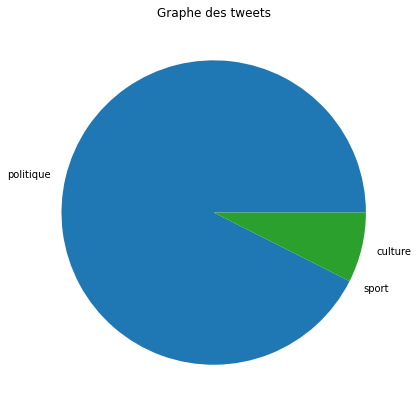

In [ ]:
fig = plt.figure(figsize =(10, 7)) 
a = pivot_clusters.drop(['total'], axis = 1)
plt.pie(a.loc['Total'], labels = a.columns)
plt.title('Graphe des tweets')
plt.show()

In [ ]:
# KMeans Clustering

In [ ]:
# politique-sport

In [ ]:
def fun(C1 ,C2):
  X = pivot_clusters[[C1, C2]].values
  from sklearn.cluster import KMeans
  wcss = []
  for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
  plt.plot(range(1,11), wcss)
  plt.xlabel('clusters')
  plt.ylabel('wcss')
  plt.show()
def cluster():
  kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=0)
  Y_kmeans = kmeans.fit_predict(X)
  plt.scatter(X[Y_kmeans==0, 0], X[Y_kmeans==0, 1], s=100, c='violet', label= 'Cluster 1')
  plt.scatter(X[Y_kmeans==1, 0], X[Y_kmeans==1, 1], s=100, c='cyan', label= 'Cluster 2')
  plt.scatter(X[Y_kmeans==2, 0], X[Y_kmeans==2, 1], s=100, c='green', label= 'Cluster 3')
  plt.scatter(X[Y_kmeans==3, 0], X[Y_kmeans==3, 1], s=100, c='blue', label= 'Cluster 4')
  plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids' )
  plt.title('Clusters politique sport ')
  plt.xlabel('politique tweets')
  plt.ylabel('sport tweets')
  plt.legend()
  plt.show()

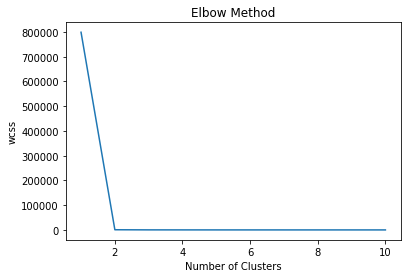

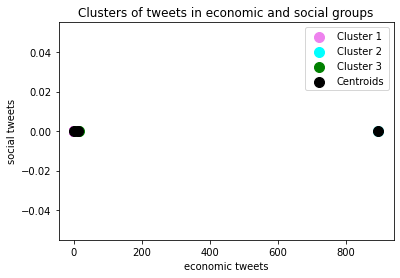

In [ ]:
fun('politique','sport')
cluster()

In [ ]:
# sport-culture

In [ ]:
def fun1(C1 ,C2):
  X = pivot_clusters[[C1, C2]].values
  from sklearn.cluster import KMeans
  wcss = []
  for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
  plt.plot(range(1,11), wcss)
  plt.xlabel('clusters')
  plt.ylabel('wcss')
  plt.show()
def cluster1():
  kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=0)
  Y_kmeans = kmeans.fit_predict(X)
  plt.scatter(X[Y_kmeans==0, 0], X[Y_kmeans==0, 1], s=100, c='violet', label= 'Cluster 1')
  plt.scatter(X[Y_kmeans==1, 0], X[Y_kmeans==1, 1], s=100, c='cyan', label= 'Cluster 2')
  plt.scatter(X[Y_kmeans==2, 0], X[Y_kmeans==2, 1], s=100, c='green', label= 'Cluster 3')
  plt.scatter(X[Y_kmeans==3, 0], X[Y_kmeans==3, 1], s=100, c='blue', label= 'Cluster 4')
  plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids' )
  plt.title('Clusters sport culture ')
  plt.ylabel('culture tweets')
  plt.xlabel('sport tweets')
  plt.legend()
  plt.show()

In [ ]:
fun1('sport','culture')
cluster1()

In [ ]:
def fun2(C1 ,C2):
  X = pivot_clusters[[C1, C2]].values
  from sklearn.cluster import KMeans
  wcss = []
  for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
  plt.plot(range(1,11), wcss)
  plt.xlabel('clusters')
  plt.ylabel('wcss')
  plt.show()
def cluster2():
  kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=0)
  Y_kmeans = kmeans.fit_predict(X)
  plt.scatter(X[Y_kmeans==0, 0], X[Y_kmeans==0, 1], s=100, c='violet', label= 'Cluster 1')
  plt.scatter(X[Y_kmeans==1, 0], X[Y_kmeans==1, 1], s=100, c='cyan', label= 'Cluster 2')
  plt.scatter(X[Y_kmeans==2, 0], X[Y_kmeans==2, 1], s=100, c='green', label= 'Cluster 3')
  plt.scatter(X[Y_kmeans==3, 0], X[Y_kmeans==3, 1], s=100, c='blue', label= 'Cluster 4')
  plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids' )
  plt.title('Clusters culture politique ')
  plt.ylabel('politique tweets')
  plt.xlabel('culture tweets')
  plt.legend()
  plt.show()